In [2]:
# Imports

import csv
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import random
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [3]:
# Get data from a csv file
def readcsv(filename):
    matrix = []
    
    with open(filename) as csvfile:
        readCSV = csv.reader(csvfile, delimiter=',')
        for row in readCSV:
            matrix += [row]
    return np.array(matrix).astype(float)

In [4]:
# Get data by generating it
# Make two clusters for now
def makedata():
    matrix = []
    for i in range(2):
        numpoints = random.randint(5,20)
        offsetx = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        offsety = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        constant = random.uniform(0, 20) * (math.pow(-1, random.randint(0,2)))
        for j in range(numpoints):
            x = random.random() + offsetx
            y = random.random() + offsety
            c = random.random() + constant
            multiplier = random.uniform(0,10)
            row = list(map(lambda x: x * multiplier, [x, y, c]))
            matrix += [row]
    return np.array(matrix)

In [5]:
# TODO - generalize for number of independent random variables
def makedataNum(numclusters):
    matrix = []
    for i in range(numclusters):
        numpoints = random.randint(5,20)
        offsetx = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        offsety = random.uniform(5, 20) * (math.pow(-1, random.randint(0,2)))
        constant = random.uniform(0, 20) * (math.pow(-1, random.randint(0,2)))
        for j in range(numpoints):
            x = random.random() + offsetx
            y = random.random() + offsety
            c = random.random() + constant
            multiplier = random.uniform(0,10)
            row = list(map(lambda x: x * multiplier, [x, y, c]))
            matrix += [row]
    return np.array(matrix)

In [6]:
# Normalize each row of the matrix
def normalize(matrix):
    normMatrix = []
    for i in range(len(matrix)):
        vector = np.array(matrix[i][:(len(matrix[i]) - 1)])
        norm = np.linalg.norm(vector)        
        normVector = matrix[i] / norm
        normMatrix += [normVector]
    return np.array(normMatrix)


In [7]:
# Plot sum of squared errors for k means clustering
# for each k <= maxclusters
# Elbow of graph = optimal number of clusters
def bestkcluster(matrix, maxclusters):
    sse = [] # sum of squared distances for each k
    for k in range(1, maxclusters+1):
        kmeans = KMeans(n_clusters=k, random_state=0).fit(matrix)
        centers = kmeans.cluster_centers_
        sse += [sum(np.min(cdist(matrix, centers, 'euclidean'), axis=1)) / matrix.shape[0]]
    plt.plot(list(range(1,maxclusters+1)), sse)
    plt.show()
    
# Find the clusters for k means clustering for a
# given k. Use bestkcluster to find optimal k
def kcluster(matrix, k):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(matrix)
    return kmeans.cluster_centers_

In [30]:
# Find the lines for the overdetermined system using LSM
# Input: matrix with rows of the form ax + by = c
# Output: square matrix
def LSM(matrix):
    # Reformat matrix to be Y = Ax for x[0] = c
#     A = []
#     for row in matrix:
#         newrow = [row[2] / row[1], -1 * row[0] / row[1]]
#         A += [newrow]
    A = matrix[:, 0:2]
    b = matrix[:, 2]
    print("Shapes:")
    print(A.shape)
    print(b.shape)
    
    # Compute B = (A.T A)
    B = np.dot(np.transpose(A), A)
    c = np.dot(np.transpose(A), b)
    x = np.dot(np.linalg.inv(B), c)
    return x
    
#     # Translate to lines ax + by = c into a matrix
#     final = []
#     for r in B:
#         final += [[-1 * r[1], 1, r[0]]]
#     return final
    

In [9]:
# When system is not overdetermined,
# try to find solution
def solution(matrix):
    if len(matrix) != len(matrix[0]) - 1:
        print("Overdetermined system")
    coefficients = [matrix[0][:len(matrix[0])-1], matrix[1][:len(matrix[1])-1]]
    consts = [matrix[0][len(matrix[0])-1], matrix[1][len(matrix[1])-1]]
    return np.linalg.solve(coefficients, consts)

In [10]:
# Input: normalized matrix (see normalize function)
# Relies on fact that 2D vectors
def graphVectors(nmatrix):
    X = []
    Y = []
    for i in range(len(nmatrix)):
        X += [nmatrix[i][0]]
        Y += [nmatrix[i][1]]
    
    origin = [0], [0]
    plt.figure()
    ax = plt.gca()
    ax.quiver(*origin, X, Y, angles='xy', scale_units='xy', scale = 1)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    plt.plot(0,0, 'ro')
    plt.draw()
    plt.show()

In [11]:
# Graph output of k-means clustering
def graphlines(equations):
    x = np.linspace(-10, 10, 1000)
    plt.figure()
    for c in equations:
        plt.plot(x, (c[2] - (x * c[0])) / c[1])
    plt.show()

Data found:
[[ -4.33080367  14.12459695   9.29683277]
 [-22.25087971  71.91387055  49.68837201]
 [-33.61323981 109.39060475  74.09463383]
 [-35.2198333  102.42688203  73.38090862]
 [-62.55140601 199.41226428 137.85796206]
 [-31.01701685  98.36722103  70.54890791]
 [-60.47542458 191.20247187 129.7409289 ]
 [ -1.49160326   4.40292838   2.93905116]
 [-58.51179276 183.75446565 127.51908983]
 [-15.47754923  49.52550204  34.41499758]
 [-40.64100672 123.32204689  80.88729785]
 [ -4.59349286  13.94405932  10.02163918]
 [-16.69976275  49.43873369  33.7989657 ]
 [-57.46855299  74.5385744   89.93205436]
 [-21.5176292   27.301129    33.87395226]
 [-62.20570947  84.21502808  92.46975152]
 [-19.9231468   29.82944935  33.72245093]
 [-45.0071776   67.26715372  74.72553361]
 [-22.75891212  32.74577556  36.69437509]
 [-37.52979438  55.68567402  63.46467187]
 [-61.833316    86.33180837 102.48442076]
 [-18.30795249  27.13826502  30.35779063]]


Lines


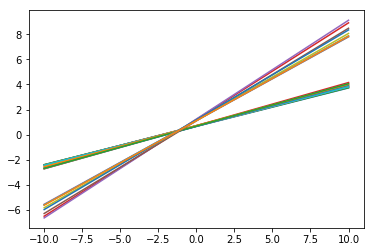



Normal Vectors:


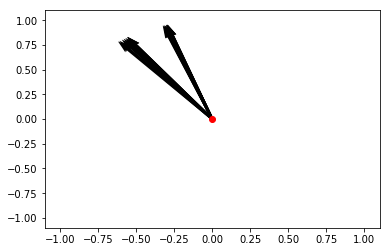

Sum of Squared Errors for each k


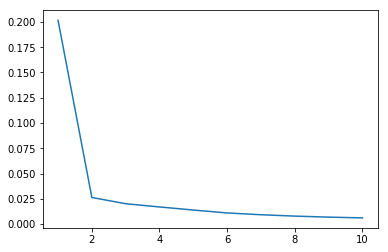

Clusters found with k = 2:
-0.305974773022063x + 0.9519742347649758y = 0.6549926903353467
-0.5784853395848369x + 0.8151969699113428y = 0.9371384061236319


Graph of lines from clusters:


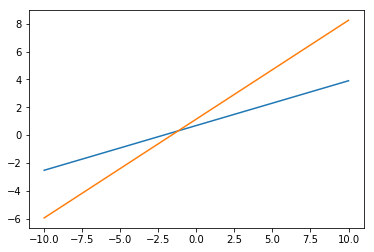

Solution:
[-1.1888986   0.30591134]


Algebraic Solution
Shapes:
(22, 2)
(22,)
[-1.17987019  0.31013241]


In [35]:
# RUN SCRIPT
if __name__ == "__main__":
    numclusters = 2 # change number of clusters
    data = makedataNum(numclusters) # Alternatively, readcsv("smalltestdata.csv")
    print("Data found:")
    print(data)
    print("\n")
    data = normalize(data)
    print("Lines")
    graphlines(data)
    print("\n")
    
    print("Normal Vectors:")
    graphVectors(data)
    
    print("Sum of Squared Errors for each k")
    bestkcluster(data, 10)
    
    cluster = kcluster(data, numclusters)
    print("Clusters found with k = " + str(numclusters) + ":")
    for c in cluster:
        print(str(c[0]) + "x + " + str(c[1]) +"y = " + str(c[2]))
    print("\n")
    
    print("Graph of lines from clusters:")
    graphlines(cluster)
    print("Solution:")
    print(solution(cluster))
    
    print("\n")
    print("Algebraic Solution")
    m = LSM(data)
    print(m)
#     for e in sqmatrix:
#         print(str(e[0]) + "x + " + str(e[1]) + "y = " + str(e[2]))
        
#     print("Graph of lines from matrix:")
#     graphlines(sqmatrix)
#     print("Solution:")
#     print(solution(sqmatrix))

In [31]:
numclusters = 2 # change number of clusters
data = makedataNum(numclusters) # Alternatively, readcsv("smalltestdata.csv")
print("Data found:")
print(data)
print("\n")
# data = normalize(data)
# print("Lines")
# graphlines(data)
# print("\n")

m = LSM(data)
print(m)

Data found:
[[ 30.11481026  21.24068031   2.96561036]
 [100.86789214  69.42535523  14.09639213]
 [116.510969    79.15956653  11.87104648]
 [138.65657963  97.20327233  14.99501968]
 [109.51979716  71.2916834   10.01422447]
 [149.93657007  99.53721421  21.1601839 ]
 [ 47.21169995  32.49593295   6.84417839]
 [ 44.19718838  29.48127636   4.41922347]
 [142.85883093  97.93218218  18.60576285]
 [ 29.28863249  20.43858557   3.19444185]
 [112.88044688  76.55233362  11.06391873]
 [ 80.27260789  52.31693674   8.79344955]
 [-44.20508438 -86.21816719 -84.21965023]
 [-38.31316793 -80.8517781  -78.00645278]
 [-13.47917075 -29.4308825  -30.66789654]
 [ -7.58107901 -14.60214163 -14.34094946]
 [-23.60829041 -48.93401647 -50.54897705]
 [-34.31524085 -74.61391878 -78.7294379 ]
 [ -6.48956974 -13.69104664 -14.69128409]
 [-35.93968582 -72.97336412 -69.65149547]
 [-35.1702769  -69.10861215 -72.08594876]]


Shapes:
(21, 2)
(21,)
[-0.83463284  1.40571424]
